# Ensemble Evaluation: Timepoint 2 - Summer 2021

Goal: to capture the complexity and nuances around the evolution of the pandemic at various stages and locations.

Location A: New York State

Timepoint 2: July 15, 2021. Setting: New York State upon the arrival of the Delta variant. Vaccines available.

## Set up for ensemble modeling

### Load dependencies

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pyciemss.Ensemble.interfaces import (
    load_and_sample_petri_ensemble, load_and_calibrate_and_sample_ensemble_model
)
from pyciemss.PetriNetODE.interfaces import (
    load_and_sample_petri_model,
    load_and_calibrate_and_sample_petri_model,
    load_and_optimize_and_sample_petri_model,
    load_and_calibrate_and_optimize_and_sample_petri_model
)
from pyciemss.visuals import plots
from pyciemss.utils import get_tspan
from pyciemss.utils.interface_utils import cdc_reformatcsv

### Collect relevant models

In [8]:
# model1_location = "../../notebook/ensemble_eval_sa/operative_models/age_vacc_var_V1.json"
model2_location = "../../notebook/ensemble_eval_sa/operative_models/age_vacc_var_v2.json"
# model3_location = "../../notebook/ensemble_eval_sa/operative_models/age_vacc_var_reinfection_v1.json"
model4_location = "../../notebook/ensemble_eval_sa/operative_models/age_vacc_var_reinfection_v2.json"
model5_location = "../../notebook/ensemble_eval_sa/operative_models/age_vacc_var_reinfection_v3.json"

## Get data

### Define a function to process the source data and produce the necessary datasets for plotting and calibration

In [14]:
def data_selector_function(data_df, train_start_row_num, train_end_row_num, forecast_end_row_num):
    '''
    This function produces three datasets: all_data, test_data, train_data.
    '''
    all_data = data_df[train_start_row_num:forecast_end_row_num].reset_index()
    all_data = all_data.drop(columns="timestep")
    all_data = all_data.drop(columns="index")

    test_data = data_df[train_end_row_num:forecast_end_row_num].reset_index()
    test_data = test_data.drop(columns="timestep")
    test_data = test_data.drop(columns="index")

    train_data = data_df[train_start_row_num:train_end_row_num].reset_index(drop=True)
    train_data1 = train_data.assign(timepoints=[float(i) for i in range(len(train_data))])
    train_data = train_data1[["timepoints", "I", "H", "D"]]

    num_timepoints = (len(train_data) + len(test_data))*10 + 1
    simulation_timepoints = list(get_tspan(0, (len(train_data) + len(test_data)), num_timepoints).detach().numpy())
    
    return all_data, test_data, train_data, simulation_timepoints

### Gather source data and set `DATA_PATH`

In [13]:
url = 'https://raw.githubusercontent.com/DARPA-ASKEM/experiments/main/thin-thread-examples/milestone_12month/evaluation/ensemble_eval_SA/datasets/aabb3684-a7ea-4f60-98f1-a8e673ad6df5/dataset.csv'
nys_data = pd.read_csv(url)
DATA_PATH = "../../notebook/ensemble_eval_sa/datasets/"

### Create and save datasets and simulation timepoints for each forecast

In [19]:
### Forecast 1: 07/15/2021 - 08/12/2021, data: 05/01/2021 - 08/11/2021

# Forecast 1: 07/15/2021 (day 75, row 541) - 08/12/2021 (day 103, row 569), train data: 05/01/2021 (day 0, row 466) - 07/14/2021 (day 74, row 540)
[all_data1, test_data1, train_data1, timepoints1] = data_selector_function(nys_data, 465, 540, 569)
train_data1[["I", "H", "D"]].to_csv(DATA_PATH + "NYS_T2_forecast1.csv")

### Forecast 2: 07/22/2021 - 08/19/2021, data: 05/01/2021 - 07/21/2021

# Forecast 2: 07/22/2021 (day 82, row 548) - 08/19/2021 (day 110, row 576), train data: 05/01/2021 (day 0, row 466) - 07/21/2021 (day 81, row 547)
[all_data2, test_data2, train_data2, timepoints2] = data_selector_function(nys_data, 465, 547, 576)
train_data2[["I", "H", "D"]].to_csv(DATA_PATH + "NYS_T2_forecast2.csv")

### Forecast 3: 07/29/2021 - 08/26/2021, data: 05/01/2021 - 07/28/2021

# Forecast 3: 07/29/2021 (day 89, row 555) - 08/26/2021 (day 117, row 583), train data: 05/01/2021 (day 0, row 466) - 07/28/2021 (day 88, row 554)
[all_data3, test_data3, train_data3, timepoints3] = data_selector_function(nys_data, 465, 554, 583)
train_data3[["I", "H", "D"]].to_csv(DATA_PATH + "NYS_T2_forecast3.csv")

### Forecast 4: 08/05/2021 - 09/02/2021, data: 05/01/2021 - 08/04/2021

# Forecast 3: 08/05/2021 (day 96, row 562) - 09/02/2021 (day 124, row 590), train data: 05/01/2021 (day 0, row 466) - 08/04/2021 (day 95, row 561)
[all_data4, test_data4, train_data4, timepoints4] = data_selector_function(nys_data, 465, 561, 590)
train_data4[["I", "H", "D"]].to_csv(DATA_PATH + "NYS_T2_forecast4.csv")

### Plot the data

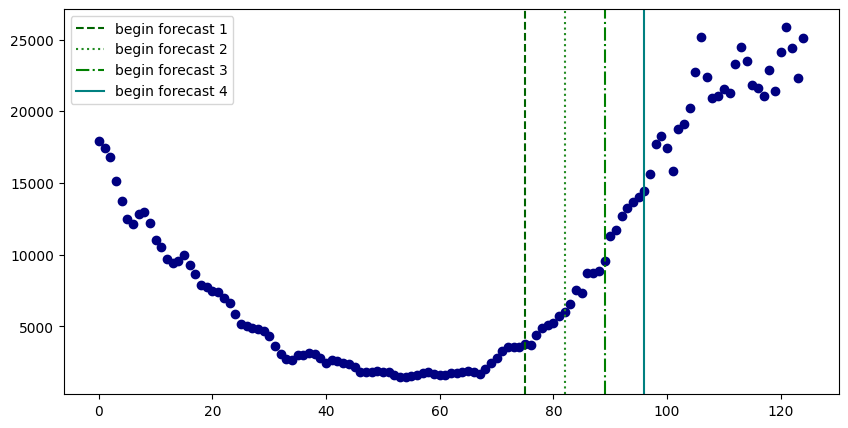

In [29]:
# specifying the plot size
plt.figure(figsize = (10, 5))
plt.scatter(all_data4.index, all_data4.I, color="navy")
# only one line may be specified; full height
plt.axvline(x = 75, color = 'darkgreen', linestyle ="--", label = 'begin forecast 1')
plt.axvline(x = 82, color = 'forestgreen', linestyle =":", label = 'begin forecast 2')
plt.axvline(x = 89, color = 'green', linestyle ="-.", label = 'begin forecast 3')
plt.axvline(x = 96, color = 'teal', label = 'begin forecast 4')
plt.legend()
# rendering plot
plt.show()

## Load, calibrate and sample an ensemble of one model

In [ ]:
num_samples=2
prior_samples = load_and_sample_petri_model(model2_location, num_samples, timepoints=timepoints, method="euler",
                                            visual_options={"title": "Prior Distributions", "subset":".*_sol"}, 
                                            time_unit="days")
#display(prior_samples)

schema = plots.trajectories(pd.DataFrame(prior_samples["data"]), subset=".*_sol",
                            points=test_data.reset_index(drop=True).rename(columns={"I":"I_data", "H":"H_data", "D":"D_data"}))
schema = plots.pad(schema, 5)
plots.ipy_display(schema)

In [ ]:
num_samples = 100
model_paths = [model2_location]
data_path = "../../notebook/ensemble_eval_sa/datasets/NY_data2.csv"
weights = [1]
solution_mappings = [{"I": "infected", "H": "hospitalized", "D": "dead"}] # "column name in data": "observable or state variable in model"
# solution_mappings = [{"I": "I", "H": "H", "D": "D"}]

# Run the calibration and sampling
result = load_and_calibrate_and_sample_ensemble_model(
    model_paths,
    data_path,
    weights,
    solution_mappings,
    num_samples,
    timepoints,
    verbose=True,
    total_population=19340000,
    num_iterations=200,
    method="euler",
    time_unit="days",
    visual_options={"title": "Calibrated Ensemble", "subset":".*_sol"}
)

# Save results
# result["data"].to_csv("../../notebook/ensemble_eval_sa/ensemble_results/partII_ensemble_of_one_results_day0_Jun032021.csv", index=False)
# result["quantiles"].to_csv("../../notebook/ensemble_eval_sa/ensemble_results/partII_ensemble_of_one_quantiles_day0_Jun032021.csv", index=False)

# q_ensemble_data = cdc_reformatcsv(filename="../../notebook/ensemble_eval_sa/ensemble_results/partII_ensemble_of_one_quantiles_day0_Jun032021.csv", 
#                                   solution_string_mapping={"I": "cases", "H": "hospitalizations", "D": "deaths"}, 
#                                   forecast_start_date="2021-07-14",
#                                   location="New York State",
#                                   drop_column_names=["timepoint_id", "number_days", "inc_cum", "output", "Forecast_Backcast"])
# q_ensemble_data.to_csv("../../notebook/ensemble_eval_sa/ensemble_results/partII_ensemble_of_one_forecast_quantiles_Jul152021.csv")

# Plot results
schema = plots.trajectories(pd.DataFrame(result["data"]), subset=".*_sol",
                            points=test_data.reset_index(drop=True).rename(columns={"I":"I_data", "H":"H_data", "D":"D_data"}),
                           )
schema = plots.pad(schema, 5)
plots.ipy_display(schema)

In [6]:
num_samples = 100
model_paths = [model4_location]
data_path = "../../notebook/ensemble_eval_sa/datasets/NY_data2.csv"
weights = [1]
solution_mappings = [{"I": "infected", "H": "hospitalized", "D": "dead"}] # "column name in data": "observable or state variable in model"

# Run the calibration and sampling
result1 = load_and_calibrate_and_sample_ensemble_model(
    model_paths,
    data_path,
    weights,
    solution_mappings,
    num_samples,
    timepoints,
    verbose=True,
    total_population=19340000,
    num_iterations=150,
    method="euler",
    time_unit="days",
    visual_options={"title": "Calibrated Ensemble", "subset":".*_sol"}
)

# # Save results
result1["data"].to_csv("../../notebook/ensemble_eval_sa/ensemble_results/partII_ensemble_of_one_results.csv", index=False)
result1["quantiles"].to_csv("../../notebook/ensemble_eval_sa/ensemble_results/partII_ensemble_of_one_quantiles.csv", index=False)

q_ensemble_data = cdc_reformatcsv(filename="../../notebook/ensemble_eval_sa/ensemble_results/partII_ensemble_of_one_quantiles.csv", 
                                  solution_string_mapping={"I": "cases", "H": "hospitalizations", "D": "deaths"}, 
                                  forecast_start_date="2021-07-14",
                                  location="New York State",
                                  drop_column_names=["timepoint_id", "number_days", "inc_cum", "output", "Forecast_Backcast"])
q_ensemble_data.to_csv("../../notebook/ensemble_eval_sa/ensemble_results/partII_ensemble_of_one_forecast_quantiles_Jul152021.csv")

# Plot results
schema = plots.trajectories(pd.DataFrame(result["data"]), subset=".*_sol",
                            points=test_data.reset_index(drop=True).rename(columns={"I":"I_data", "H":"H_data", "D":"D_data"}),
                           )
schema = plots.pad(schema, 5)
plots.ipy_display(schema)

iteration 0: loss = 1509.5168316960335
iteration 25: loss = 1312.2123957276344
iteration 50: loss = 1294.554027378559
iteration 75: loss = 1275.190992295742
iteration 100: loss = 1259.2022492289543
iteration 125: loss = 1258.4049859642982


NameError: name 'result' is not defined

In [ ]:
num_samples = 100
model_paths = [model5_location]
data_path = "../../notebook/ensemble_eval_sa/datasets/NY_data2.csv"
weights = [1]
solution_mappings = [{"I": "infected", "H": "hospitalized", "D": "dead"}] # "column name in data": "observable or state variable in model"

# Run the calibration and sampling
result2 = load_and_calibrate_and_sample_ensemble_model(
    model_paths,
    data_path,
    weights,
    solution_mappings,
    num_samples,
    timepoints,
    verbose=True,
    total_population=19340000,
    num_iterations=26,
    method="euler",
    time_unit="days",
    visual_options={"title": "Calibrated Ensemble", "subset":".*_sol"}
)

# # Save results
# result2["data"].to_csv("../../notebook/ensemble_eval_sa/ensemble_results/partII_ensemble_of_one_results_day0_Jun032021.csv", index=False)
# result2["quantiles"].to_csv("../../notebook/ensemble_eval_sa/ensemble_results/partII_ensemble_of_one_quantiles_day0_Jun032021.csv", index=False)

# Plot results
schema = plots.trajectories(pd.DataFrame(result["data"]), subset=".*_sol",
                            points=test_data.reset_index(drop=True).rename(columns={"I":"I_data", "H":"H_data", "D":"D_data"}),
                           )
schema = plots.pad(schema, 5)
plots.ipy_display(schema)

## Load, calibrate and sample an ensemble of several models

In [ ]:
num_samples = 2
model_paths = [model2_location, model4_location, model5_location]
data_path = "../../notebook/ensemble_eval_sa/datasets/NY_data2.csv"
weights = [0.1, 0.4, 0.5] #[1/len(model_paths) for i in model_paths]
solution_mappings = [{"I": "infected", "H": "hospitalized", "D": "dead"},
                     {"I": "infected", "H": "hospitalized", "D": "dead"}, 
                     {"I": "infected", "H": "hospitalized", "D": "dead"},
                     ]

# Run the calibration and sampling
result3 = load_and_calibrate_and_sample_ensemble_model(
    model_paths,
    data_path,
    weights,
    solution_mappings,
    num_samples,
    timepoints,
    verbose=True,
    total_population=19340000,
    num_iterations=200,
    method="euler",
    time_unit="days",
    visual_options={"title": "Calibrated Ensemble", "subset":".*_sol"}
)

# Save results
result3["data"].to_csv("../../notebook/ensemble_eval_sa/ensemble_results/partII_ensemble_of_many_results_day0_Jun032021.csv", index=False)
result3["quantiles"].to_csv("../../notebook/ensemble_eval_sa/ensemble_results/partII_ensemble_of_many_quantiles_day0_Jun032021.csv", index=False)

# Plot results
schema = plots.trajectories(pd.DataFrame(result["data"]), subset=".*_sol",
                            points=test_data.reset_index(drop=True).rename(columns={"I":"I_data", "H":"H_data", "D":"D_data"}),
                           )
schema = plots.pad(schema, 5)
plots.ipy_display(schema)

In [ ]:
q_ensemble_data = cdc_reformatcsv(filename="../../notebook/ensemble_eval_sa/ensemble_results/partII_ensemble_of_many_quantiles_day0_Jun032021.csv", 
                                  solution_string_mapping={"I": "cases", "H": "hospitalizations", "D": "deaths"}, 
                                  forecast_start_date="2021-07-14",
                                  location="New York State",
                                  drop_column_names=["timepoint_id", "number_days", "inc_cum", "output", "Forecast_Backcast"])
q_ensemble_data.to_csv("../../notebook/ensemble_eval_sa/ensemble_results/partII_ensemble_of_many_forecast_quantiles_Jul152021.csv")